In [1]:
print("Hello, World!")

Hello, World!


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
digits = ['0','1','2','3','4','5','6','7','8','9']

In [3]:
df1 = pd.read_csv('../data files/Monthly_COVID-19_Death.csv')
df3 = pd.read_csv('../data files/AH_Cumulative_Provisional_COVID-19_Deaths.csv')
df4 = pd.read_csv('../data files/Provisional_COVID-19_death_counts.csv')


# dataset 1

In [4]:
df1.columns

Index(['data_as_of', 'jurisdiction_residence', 'data_period_start',
       'data_period_end', 'group', 'subgroup1', 'subgroup2', 'covid_deaths',
       'crude_rate', 'conf_int_95pct_lower_crude',
       'conf_int_95pct_upper_crude', 'note'],
      dtype='object')

In [5]:
df1_cleaned = df1.drop_duplicates().dropna()

In [6]:
df1_cleaned.sample(5)

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note
57620,06/13/2024,Region 5,10/01/2020,10/31/2020,Age and Race,65-74 years,Non-Hispanic Asian,12.0,9.20,3.99,14.41,Rates for death counts <20 should be interpret...
58137,06/13/2024,Region 5,02/01/2024,02/29/2024,Age and Race,65-74 years,Non-Hispanic Black,17.0,3.53,1.85,5.21,Rates for death counts <20 should be interpret...
43312,06/13/2024,Region 1,12/01/2020,12/31/2020,Age and Race,65-74 years,Non-Hispanic Asian,18.0,36.52,19.65,53.38,Rates for death counts <20 should be interpret...
30958,06/13/2024,Region 7,07/01/2020,07/31/2020,Race and Age,Hispanic,75+ years,11.0,54.04,22.10,85.97,Rates for death counts <20 should be interpret...
20421,06/13/2024,Region 3,05/01/2021,05/31/2021,Race and Age,Non-Hispanic Asian,65-74 years,16.0,13.36,6.81,19.90,Rates for death counts <20 should be interpret...


In [7]:
print(df1_cleaned['subgroup1'].unique()) #*

['Hispanic' 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander' '30-39 years'
 '40-49 years' '50-64 years' '65-74 years' '75+ years' '18-29 years'
 '12-17 years' '0-4 years' '5-11 years']


In [8]:
# code to section out age ranges from ethnicities; subgroup1
# newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]
# ages = df1_cleaned[(df1_cleaned.subgroup1 == '0-4 years')
#pd.concat([df1, df2])

In [9]:
print(df1_cleaned['subgroup2'].unique()) #*

['30-39 years' '40-49 years' '50-64 years' '65-74 years' '75+ years'
 '18-29 years' '12-17 years' '0-4 years' '5-11 years' 'Hispanic'
 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander']


In [10]:
ages = []
ethnicities = []



for i, row in df1_cleaned.iterrows():
    if 'years' in row['subgroup1']:
        ages.append(row.subgroup1)
        ethnicities.append(row.subgroup2)
    else:
        ethnicities.append(row.subgroup1)
        ages.append(row.subgroup2)

set(ages)
set(ethnicities)

df1_cleaned['Ages'] = ages
df1_cleaned['Races'] = ethnicities
# loop through subgroup1, find values with 'years'

In [11]:
df1_cleaned.sample(50)

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note,Ages,Races
73007,06/13/2024,United States,03/01/2022,03/31/2022,Age and Race,0-4 years,Non-Hispanic White,18.0,0.20,0.11,0.29,Rates for death counts <20 should be interpret...,0-4 years,Non-Hispanic White
20754,06/13/2024,Region 3,08/01/2022,08/31/2022,Race and Age,Non-Hispanic Black,40-49 years,11.0,1.62,0.66,2.58,Rates for death counts <20 should be interpret...,40-49 years,Non-Hispanic Black
36190,06/13/2024,Region 8,09/01/2023,09/30/2023,Race and Age,Non-Hispanic White,65-74 years,17.0,1.66,0.87,2.45,Rates for death counts <20 should be interpret...,65-74 years,Non-Hispanic White
40252,06/13/2024,United States,02/01/2022,02/28/2022,Race and Age,Non-Hispanic Asian,30-39 years,12.0,0.36,0.15,0.56,Rates for death counts <20 should be interpret...,30-39 years,Non-Hispanic Asian
37172,06/13/2024,Region 9,08/01/2021,08/31/2021,Race and Age,Non-Hispanic American Indian or Alaska Native,75+ years,16.0,70.81,36.11,105.51,Rates for death counts <20 should be interpret...,75+ years,Non-Hispanic American Indian or Alaska Native
60752,06/13/2024,Region 6,03/01/2021,03/31/2021,Age and Race,30-39 years,Non-Hispanic Black,15.0,1.67,0.82,2.51,Rates for death counts <20 should be interpret...,30-39 years,Non-Hispanic Black
14162,06/13/2024,Region 10,12/01/2020,12/31/2020,Race and Age,Non-Hispanic American Indian or Alaska Native,50-64 years,17.0,35.34,18.54,52.15,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic American Indian or Alaska Native
12375,06/13/2024,Region 1,03/01/2022,03/31/2022,Race and Age,Non-Hispanic Black,75+ years,10.0,23.25,8.84,37.66,Rates for death counts <20 should be interpret...,75+ years,Non-Hispanic Black
27777,06/13/2024,Region 6,06/01/2020,06/30/2020,Race and Age,Hispanic,18-29 years,14.0,0.53,0.25,0.80,Rates for death counts <20 should be interpret...,18-29 years,Hispanic
41344,06/13/2024,United States,05/01/2020,05/31/2020,Race and Age,Non-Hispanic Native Hawaiian or Other Pacific ...,50-64 years,13.0,12.50,5.71,19.30,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic Native Hawaiian or Other Pacific ...


In [12]:
df1_cleaned = df1_cleaned.drop(columns = ['subgroup1', 'subgroup2'])

In [13]:
# code to section out age ranges from ethnicities; subgroup2
df1_cleaned.sample(15)

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note,Ages,Races
73055,06/13/2024,United States,10/01/2021,10/31/2021,Age and Race,12.0,0.09,0.04,0.14,Rates for death counts <20 should be interpret...,12-17 years,Non-Hispanic White
51016,06/13/2024,Region 3,07/01/2022,07/31/2022,Age and Race,11.0,18.61,7.61,29.61,Rates for death counts <20 should be interpret...,75+ years,Hispanic
11830,06/13/2024,Region 1,12/01/2020,12/31/2020,Race and Age,18.0,36.52,19.65,53.38,Rates for death counts <20 should be interpret...,65-74 years,Non-Hispanic Asian
72839,06/13/2024,United States,06/01/2021,06/30/2021,Age and Race,10.0,9.62,3.66,15.58,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic Native Hawaiian or Other Pacific ...
58788,06/13/2024,Region 5,12/01/2020,12/31/2020,Age and Race,17.0,0.30,0.16,0.45,Rates for death counts <20 should be interpret...,18-29 years,Non-Hispanic White
61726,06/13/2024,Region 6,11/01/2022,11/30/2022,Age and Race,10.0,0.37,0.14,0.61,Rates for death counts <20 should be interpret...,30-39 years,Non-Hispanic White
16626,06/13/2024,Region 2,02/01/2023,02/28/2023,Race and Age,15.0,4.20,2.07,6.33,Rates for death counts <20 should be interpret...,65-74 years,Hispanic
65781,06/13/2024,Region 8,09/01/2020,09/30/2020,Age and Race,17.0,228.37,119.81,336.93,Rates for death counts <20 should be interpret...,75+ years,Non-Hispanic American Indian or Alaska Native
29012,06/13/2024,Region 6,10/01/2021,10/31/2021,Race and Age,19.0,14.85,8.17,21.53,Rates for death counts <20 should be interpret...,65-74 years,Non-Hispanic Asian
60445,06/13/2024,Region 6,02/01/2022,02/28/2022,Age and Race,16.0,5.30,2.70,7.89,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic Asian


In [14]:
print(df1_cleaned['jurisdiction_residence'].unique())
'''
the regions are:
region 1:
region 2:
region 3:
region 4:
region 5:
region 6:
region 7:
region 8:
region 9:
region 10:
'''

['Region 1' 'Region 10' 'Region 2' 'Region 3' 'Region 4' 'Region 5'
 'Region 6' 'Region 7' 'Region 8' 'Region 9' 'United States']


'\nthe regions are:\nregion 1:\nregion 2:\nregion 3:\nregion 4:\nregion 5:\nregion 6:\nregion 7:\nregion 8:\nregion 9:\nregion 10:\n'

In [15]:
print(df1_cleaned['covid_deaths'].unique())

[12. 10. 18. 13. 11. 19. 14. 15. 17. 16.]


In [16]:
print(df1_cleaned['crude_rate'].unique())

[4.1800e+00 3.4900e+00 7.3900e+00 4.9300e+00 5.3400e+00 4.5200e+00
 7.8000e+00 4.3800e+00 5.1800e+00 4.7800e+00 7.1700e+00 1.7570e+01
 1.3800e+01 1.5060e+01 2.5900e+01 3.2370e+01 3.6690e+01 2.3740e+01
 1.0860e+01 1.2410e+01 8.5300e+00 1.0080e+01 3.6520e+01 2.0290e+01
 2.8400e+01 2.2320e+01 5.2990e+01 3.6430e+01 3.3120e+01 6.9400e+00
 1.1970e+01 1.2720e+01 7.4800e+00 1.0470e+01 1.0050e+01 5.8200e+00
 9.0000e+00 9.5300e+00 6.8800e+00 2.6310e+01 2.4930e+01 2.3540e+01
 1.3850e+01 1.5230e+01 2.2160e+01 4.1850e+01 3.0220e+01 4.4170e+01
 2.5570e+01 2.7900e+01 3.4870e+01 2.3250e+01 9.8000e-01 7.3000e-01
 1.0200e+00 8.0000e-01 9.5000e-01 1.5000e+00 7.9000e-01 1.1100e+00
 1.0300e+00 8.7000e-01 6.6000e-01 7.0000e-01 5.8000e-01 4.7000e-01
 3.9000e-01 5.0000e-01 4.3000e-01 1.3200e+00 8.3000e-01 3.6400e+00
 5.9500e+00 5.6200e+00 4.1100e+00 7.4000e+00 6.5800e+00 6.1700e+00
 6.6900e+00 5.3500e+00 8.0300e+00 4.4600e+00 5.8000e+00 4.9100e+00
 2.4030e+01 2.5530e+01 2.7040e+01 1.5020e+01 2.8540e+01 1.9530

In [17]:
# subgroup1 & 2, crude rate and covid deaths

In [18]:
#subgroup1 vs crude rate

In [19]:
#plt.scatter(df1_cleaned.loc[:, "subgroup1"],df1_cleaned.loc[:, "crude_rate"] )

In [20]:
#plt.scatter(df1_cleaned.loc[:, "subgroup1"],df1_cleaned.loc[:, "covid_deaths"] )

In [21]:
#plt.scatter(df1_cleaned.loc[:, "subgroup2"],df1_cleaned.loc[:, "crude_rate"] )

In [22]:
#plt.scatter(df1_cleaned.loc[:, "subgroup2"],df1_cleaned.loc[:, "covid_deaths"] )

# dataset 3

In [23]:
df3.columns

Index(['Data as of', 'Sex', 'Race/Ethnicity', 'Age group', 'Year', 'MMWRWeek',
       'Analysis Period Start Date', 'Analysis Period End Date', 'AllCause',
       'NaturalCause', 'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [24]:
df3_cleaned = df3.drop_duplicates().dropna()

In [25]:
df3_cleaned.describe()

,Year,MMWRWeek,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2020.0,30.0,14425.216667,13403.950000,178.433333,2670.366667,434.391667,589.916667,284.050000,717.391667,210.158333,235.975000,391.341667,3047.250000,701.883333,1122.675000,1037.800000
std,0.0,0.0,38749.959317,37511.747131,459.592727,7354.500710,979.201178,2850.212047,787.164039,2381.169698,625.269542,634.025653,721.033310,9408.365363,2293.671385,2627.605368,2393.799889
min,2020.0,30.0,14.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,30.0,494.250000,326.750000,4.750000,38.000000,4.000000,0.000000,8.750000,3.000000,4.000000,2.000000,31.500000,21.500000,6.000000,10.750000,10.000000
50%,2020.0,30.0,1540.500000,1304.500000,15.000000,188.000000,48.500000,0.000000,30.000000,25.500000,15.000000,16.000000,84.000000,174.000000,45.500000,109.500000,103.000000
75%,2020.0,30.0,9636.000000,7283.000000,96.750000,1332.000000,334.750000,43.000000,190.750000,143.250000,97.750000,150.500000,342.500000,1354.500000,339.250000,933.500000,877.500000
max,2020.0,30.0,264759.000000,257929.000000,2470.000000,39883.000000,5480.000000,27255.000000,5306.000000,12945.000000,3461.000000,3769.000000,4191.000000,68187.000000,19387.000000,19199.000000,17165.000000


In [26]:
print(df3_cleaned['Sex'].unique())

['Female (F)' 'Male (M)']


In [27]:
print(df3_cleaned['Race/Ethnicity'].unique())

['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White' 'Other']


In [28]:
print(df3_cleaned['Age group'].unique())

['0-4 years' '15-24 years' '25-34 years' '35-44 years' '45-54 years'
 '5-14 years' '55-64 years' '65-74 years' '75-84 years'
 '85 years and over']


In [29]:
print(df3_cleaned['COVID-19 (U071, Multiple Cause of Death)'].unique())

[    6    29   105   252   624     2  1302  1964  2356  2377     0     1
    19    32    62   112   133   123    82    16   111   254   482   663
  1115   104   301   775  2063  3259  3724  3801    12    56   129   483
  1814  4711  9161 19199    14    13    36    87   159   154   170     5
    58   306   941  2131  3457  3838  3066  1891     7    34    41    96
   150   108    71    31    70   240   638  1027   986   769    33   182
   451  1308  3065  4721  4156  2215    23   241   931  3351  7420 10788
 11972     3    30    75   204   322   283   167]


In [30]:
print(df3_cleaned['COVID-19 (U071, Underlying Cause of Death)'].unique())

[    3    26    98   237   588     2  1234  1869  2242  2184     0     1
    15    28    55   108   127   119    77    14    30   104   244   446
   619  1014    27   274   732  1916  3043  3457  3436    11    47   112
   435  1661  4323  8341 17165    12    36    82   147   145   154    49
   286   888  2040     4  3299  3667  2893  1770     7    37    90   146
   141   102    66     5    68   230   609   983   923   724   171   407
  1230     6  2859  4439  3906  2067    17   214   874  3086  6896  9986
 10967    70   190   305   265]


In [31]:
# sex, race/ethnicity, age group, two COVID labels
## how to measure timeframe?

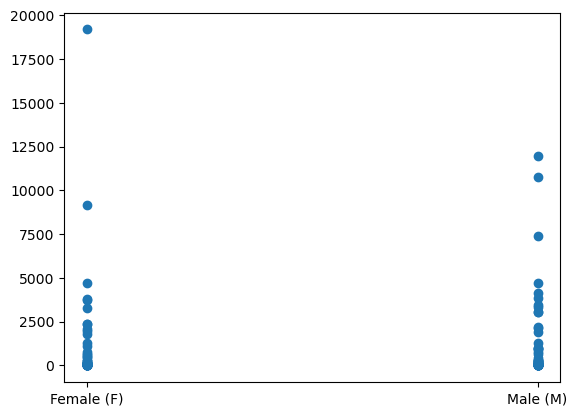

In [32]:
plt.scatter(df3_cleaned.loc[:, "Sex"],df3_cleaned.loc[:, "COVID-19 (U071, Multiple Cause of Death)"] )

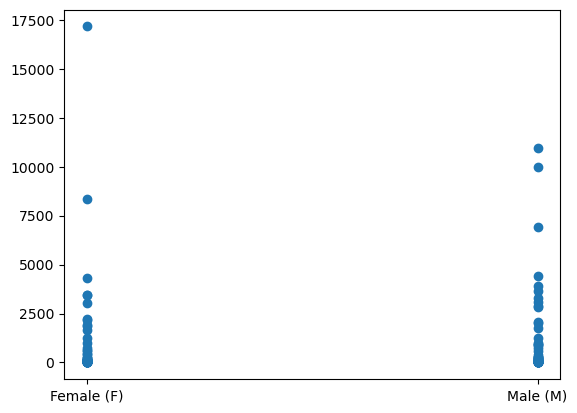

In [33]:
plt.scatter(df3_cleaned.loc[:, "Sex"],df3_cleaned.loc[:, "COVID-19 (U071, Underlying Cause of Death)"] )

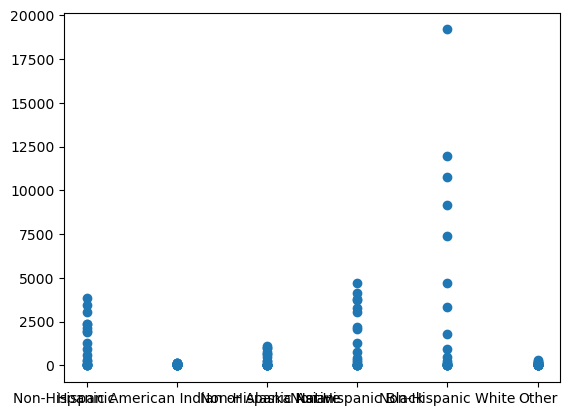

In [34]:
plt.scatter(df3_cleaned.loc[:, "Race/Ethnicity"],df3_cleaned.loc[:, "COVID-19 (U071, Multiple Cause of Death)"] )

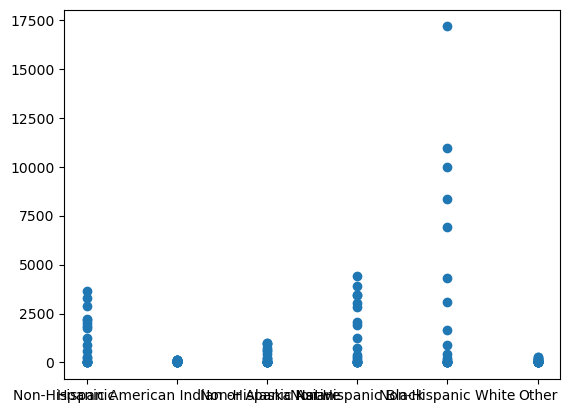

In [35]:
plt.scatter(df3_cleaned.loc[:, "Race/Ethnicity"],df3_cleaned.loc[:, "COVID-19 (U071, Underlying Cause of Death)"] )

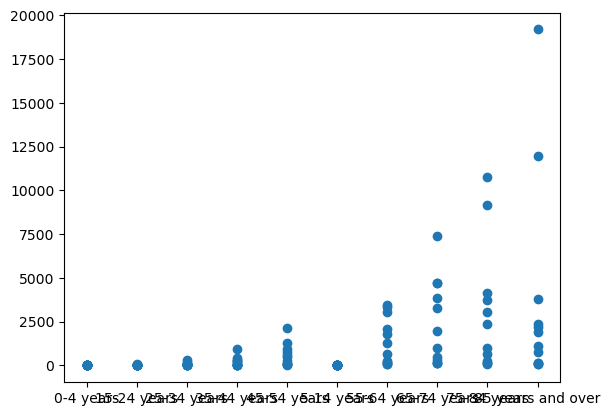

In [36]:
plt.scatter(df3_cleaned.loc[:, "Age group"],df3_cleaned.loc[:, "COVID-19 (U071, Multiple Cause of Death)"] )

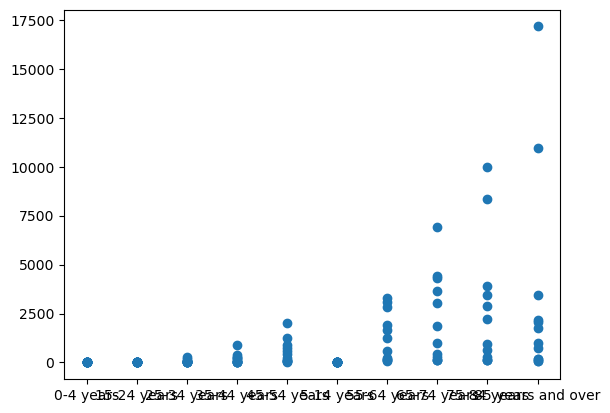

In [37]:
plt.scatter(df3_cleaned.loc[:, "Age group"],df3_cleaned.loc[:, "COVID-19 (U071, Underlying Cause of Death)"] )

# dataset 4

In [38]:
df4.columns

Index(['data_as_of', 'jurisdiction_residence', 'year', 'month', 'group',
       'subgroup1', 'subgroup2', 'COVID_deaths', 'crude_COVID_rate',
       'aa_COVID_rate', 'crude_COVID_rate_ann', 'aa_COVID_rate_ann',
       'footnote'],
      dtype='object')

In [39]:
df4_cleaned = df4.drop_duplicates()
# cannot use .dropna()

In [40]:
df4_cleaned.describe()

,year,month,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann
count,48114.000000,48114.000000,36689.000000,32768.000000,3970.000000,32768.000000,3970.000000
mean,2021.777778,6.166667,262.852354,8.521057,6.354534,102.251651,76.265718
std,1.314698,3.435957,1709.557949,34.755491,10.101416,417.067992,121.215071
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,3.000000,0.000000,0.000000,1.100000,0.000000,13.400000
50%,2022.000000,6.000000,0.000000,0.000000,2.650000,0.000000,31.800000
75%,2023.000000,9.000000,41.000000,2.700000,7.575000,32.900000,90.650000
max,2024.000000,12.000000,67990.000000,1466.300000,162.400000,17595.600000,1948.800000


In [41]:
print(df4_cleaned['jurisdiction_residence'].unique())

['United States' 'Region 1' 'Region 2' 'Region 3' 'Region 4' 'Region 5'
 'Region 6' 'Region 7' 'Region 8' 'Region 9' 'Region 10']


In [42]:
print(df4_cleaned['group'].unique())

['Sex' 'Age' 'Race' 'Race and Age']


In [43]:
print(df4_cleaned['subgroup1'].unique()) #*

['Female' 'Male' '0-4 years' '12-17 years' '18-29 years' '30-39 years'
 '40-49 years' '5-11 years' '50-64 years' '65-74 years'
 '75 years and over' 'Hispanic'
 'Non-Hispanic American Indian or Alaska Native' 'Non-Hispanic Asian'
 'Non-Hispanic Asian, Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic Black'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']


In [44]:
print(df4_cleaned['subgroup2'].unique())

[nan '0-4 years' '12-17 years' '18-29 years' '30-39 years' '40-49 years'
 '5-11 years' '50-64 years' '65-74 years' '75 years and over']


In [45]:
df4_ages = []
df4_ethnicities = []



for i, row in df4_cleaned.iterrows():
    if 'years' in row['subgroup1']:
        df4_ages.append(row.subgroup1)
        df4_ethnicities.append(row.subgroup2)
    else:
        df4_ethnicities.append(row.subgroup1)
        df4_ages.append(row.subgroup2)

set(df4_ages)
set(df4_ethnicities)

df4_cleaned['Ages'] = df4_ages
df4_cleaned['Races'] = df4_ethnicities

In [46]:
df4_cleaned.sample(50)

,data_as_of,jurisdiction_residence,year,month,group,subgroup1,subgroup2,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,footnote,Ages,Races
38724,07/11/2024 12:00:00 AM,Region 5,2023,8,Age,40-49 years,NaN,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...,40-49 years,NaN
37953,07/11/2024 12:00:00 AM,Region 6,2023,7,Race and Age,"Non-Hispanic Asian, Native Hawaiian or Other P...",0-4 years,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...,0-4 years,"Non-Hispanic Asian, Native Hawaiian or Other P..."
23941,07/11/2024 12:00:00 AM,Region 9,2022,3,Race and Age,"Non-Hispanic Asian, Native Hawaiian or Other P...",12-17 years,0.0,0.0,NaN,0.0,NaN,NaN,12-17 years,"Non-Hispanic Asian, Native Hawaiian or Other P..."
21434,07/11/2024 12:00:00 AM,United States,2022,1,Race and Age,"Non-Hispanic Asian, Native Hawaiian or Other P...",5-11 years,0.0,0.0,NaN,0.0,NaN,NaN,5-11 years,"Non-Hispanic Asian, Native Hawaiian or Other P..."
28009,07/11/2024 12:00:00 AM,Region 4,2022,8,Race and Age,Non-Hispanic Native Hawaiian or Other Pacific ...,12-17 years,0.0,0.0,NaN,0.0,NaN,NaN,12-17 years,Non-Hispanic Native Hawaiian or Other Pacific ...
10629,07/11/2024 12:00:00 AM,Region 10,2020,12,Race and Age,Hispanic,0-4 years,0.0,0.0,NaN,0.0,NaN,NaN,0-4 years,Hispanic
28158,07/11/2024 12:00:00 AM,Region 6,2022,8,Race and Age,"Non-Hispanic Asian, Native Hawaiian or Other P...",50-64 years,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...,50-64 years,"Non-Hispanic Asian, Native Hawaiian or Other P..."
21918,07/11/2024 12:00:00 AM,Region 6,2022,1,Race and Age,"Non-Hispanic Asian, Native Hawaiian or Other P...",30-39 years,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...,30-39 years,"Non-Hispanic Asian, Native Hawaiian or Other P..."
45236,07/11/2024 12:00:00 AM,Region 8,2024,3,Race and Age,Non-Hispanic Asian,18-29 years,0.0,0.0,NaN,0.0,NaN,NaN,18-29 years,Non-Hispanic Asian
29012,07/11/2024 12:00:00 AM,Region 6,2022,9,Race,"Non-Hispanic Asian, Native Hawaiian or Other P...",NaN,28.0,1.5,2.2,17.9,25.8,NaN,NaN,"Non-Hispanic Asian, Native Hawaiian or Other P..."


In [47]:
df4_cleaned = df4_cleaned.drop(columns = ['subgroup1', 'subgroup2'])

In [48]:
df4_cleaned.sample(15)

,data_as_of,jurisdiction_residence,year,month,group,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,footnote,Ages,Races
22911,07/11/2024 12:00:00 AM,Region 7,2022,2,Race and Age,0.0,0.0,NaN,0.0,NaN,NaN,50-64 years,Non-Hispanic Native Hawaiian or Other Pacific ...
34361,07/11/2024 12:00:00 AM,Region 6,2023,3,Race,558.0,2.8,2.0,33.4,23.9,NaN,NaN,Non-Hispanic White
34003,07/11/2024 12:00:00 AM,Region 1,2023,3,Race and Age,0.0,0.0,NaN,0.0,NaN,NaN,12-17 years,Non-Hispanic Native Hawaiian or Other Pacific ...
32017,07/11/2024 12:00:00 AM,Region 10,2022,12,Race and Age,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...,40-49 years,Hispanic
3467,07/11/2024 12:00:00 AM,Region 9,2020,4,Race and Age,0.0,0.0,NaN,0.0,NaN,NaN,18-29 years,Non-Hispanic Native Hawaiian or Other Pacific ...
16893,07/11/2024 12:00:00 AM,Region 10,2021,7,Race and Age,0.0,0.0,NaN,0.0,NaN,NaN,0-4 years,"Non-Hispanic Asian, Native Hawaiian or Other P..."
4783,07/11/2024 12:00:00 AM,Region 4,2020,6,Age,19.0,NaN,NaN,NaN,NaN,Rates for death counts <20 are unreliable.,18-29 years,NaN
7412,07/11/2024 12:00:00 AM,Region 3,2020,9,Race and Age,0.0,0.0,NaN,0.0,NaN,NaN,5-11 years,Non-Hispanic Asian
18569,07/11/2024 12:00:00 AM,Region 9,2021,9,Race and Age,45.0,1.2,NaN,14.3,NaN,NaN,18-29 years,Hispanic
31876,07/11/2024 12:00:00 AM,Region 8,2022,12,Race and Age,0.0,0.0,NaN,0.0,NaN,NaN,65-74 years,Non-Hispanic Asian


In [49]:
print(df4_cleaned['crude_COVID_rate'].unique())

[ nan  0.   1.7 ... 51.8 46.7 46.8]


In [50]:
print(df4_cleaned['COVID_deaths'].unique())

[3.000e+00 0.000e+00 2.000e+00 ... 2.399e+03 1.489e+03 7.920e+02]


# Final dataset (merged)

In [51]:
datasets = [df1_cleaned, df3_cleaned, df4_cleaned]

In [52]:
final_dataset = pd.concat(datasets).reset_index()
#axis = 0
final_dataset.sample(20)

,index,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,...,"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",year,month,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,footnote
6339,2941,07/11/2024 12:00:00 AM,Region 3,NaN,NaN,Race and Age,NaN,NaN,NaN,NaN,...,NaN,NaN,2020.0,4.0,79.0,71.6,NaN,859.7,NaN,NaN
34484,31086,07/11/2024 12:00:00 AM,Region 9,NaN,NaN,Race and Age,NaN,NaN,NaN,NaN,...,NaN,NaN,2022.0,11.0,0.0,0.0,NaN,0.0,NaN,NaN
40714,37316,07/11/2024 12:00:00 AM,Region 9,NaN,NaN,Race and Age,NaN,NaN,NaN,NaN,...,NaN,NaN,2023.0,6.0,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...
35081,31683,07/11/2024 12:00:00 AM,Region 6,NaN,NaN,Race,NaN,NaN,NaN,NaN,...,NaN,NaN,2022.0,12.0,25.0,3.7,3.8,44.3,45.3,NaN
21741,18343,07/11/2024 12:00:00 AM,Region 6,NaN,NaN,Race and Age,NaN,NaN,NaN,NaN,...,NaN,NaN,2021.0,9.0,0.0,0.0,NaN,0.0,NaN,NaN
171,14782,06/13/2024,Region 10,01/01/2024,01/31/2024,Race and Age,11.0,23.51,9.62,37.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44621,41223,07/11/2024 12:00:00 AM,Region 2,NaN,NaN,Race and Age,NaN,NaN,NaN,NaN,...,NaN,NaN,2023.0,11.0,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...
46869,43471,07/11/2024 12:00:00 AM,Region 8,NaN,NaN,Race and Age,NaN,NaN,NaN,NaN,...,NaN,NaN,2024.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
29481,26083,07/11/2024 12:00:00 AM,Region 3,NaN,NaN,Sex,NaN,NaN,NaN,NaN,...,NaN,NaN,2022.0,6.0,554.0,3.6,3.4,43.2,40.5,NaN
48369,44971,07/11/2024 12:00:00 AM,Region 5,NaN,NaN,Race,NaN,NaN,NaN,NaN,...,NaN,NaN,2024.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN


In [53]:
final_dataset.columns

Index(['index', 'data_as_of', 'jurisdiction_residence', 'data_period_start',
       'data_period_end', 'group', 'covid_deaths', 'crude_rate',
       'conf_int_95pct_lower_crude', 'conf_int_95pct_upper_crude', 'note',
       'Ages', 'Races', 'Data as of', 'Sex', 'Race/Ethnicity', 'Age group',
       'Year', 'MMWRWeek', 'Analysis Period Start Date',
       'Analysis Period End Date', 'AllCause', 'NaturalCause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I6

In [54]:
type(final_dataset)

pandas.core.frame.DataFrame

In [55]:
# plt.plot(final_dataset["Races"],final_dataset["crude_rate"])

In [56]:
data_for_plot_one = final_dataset[['Races', 'crude_rate']].dropna()

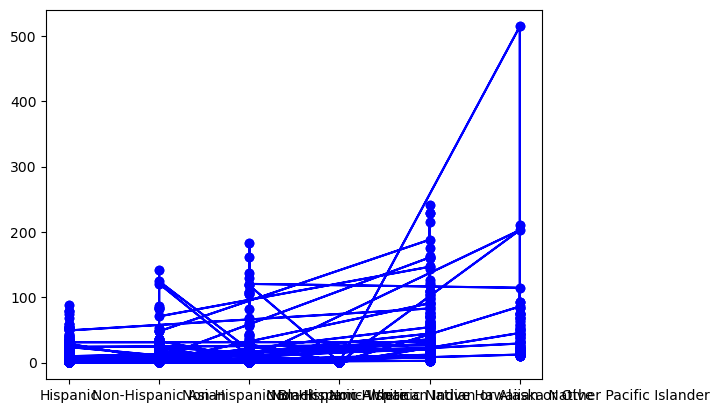

In [57]:
plt.plot(data_for_plot_one["Races"], data_for_plot_one["crude_rate"],  marker='o', linestyle='-', color='b')

In [58]:
data_for_plot_two = final_dataset[[ 'Ages', 'crude_rate']].dropna()

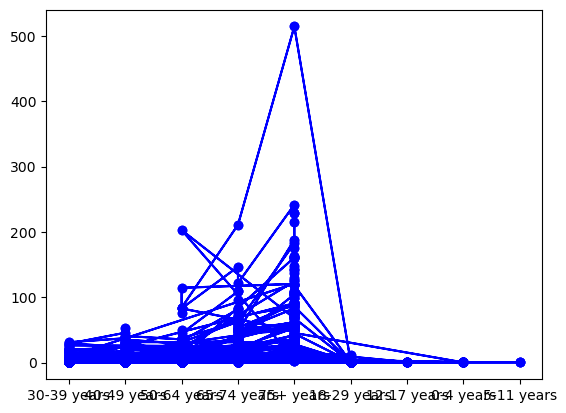

In [59]:
plt.plot(data_for_plot_two["Ages"], data_for_plot_two["crude_rate"],  marker='o', linestyle='-', color='b')

In [60]:
'''
final_dataset = pd.concat(datasets).reset_index(drop=True)

final_dataset.sample(20)
 
data_for_plot = final_dataset[['Races', 'crude_rate']].dropna()

plt.bar(data_for_plot["Races"], data_for_plot["crude_rate"])
 '''

'\nfinal_dataset = pd.concat(datasets).reset_index(drop=True)\n\nfinal_dataset.sample(20)\n \ndata_for_plot = final_dataset[[\'Races\', \'crude_rate\']].dropna()\n\nplt.bar(data_for_plot["Races"], data_for_plot["crude_rate"])\n '